In [1]:
import matplotlib.pyplot as plt
import gcsfs

In [2]:
from xmip.preprocessing import rename_cmip6

In [3]:
import xarray as xr

In [4]:
xr.set_options(keep_attrs=True)

## xarray-datatree

In [5]:
from datatree import open_datatree, DataTree

In [6]:
cmip_stores = {
'IPSL-CM6A-LR/historical':  'gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r4i1p1f1/Omon/tos/gn/v20180803/',
'MPI-ESM1-2-LR/historical': 'gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r4i1p1f1/Omon/tos/gn/v20190710/',
'CESM2/historical':         'gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4i1p1f1/Omon/tos/gn/v20190308/',
'IPSL-CM6A-LR/ssp126':      'gs://cmip6/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp126/r4i1p1f1/Omon/tos/gn/v20191121/',
'IPSL-CM6A-LR/ssp585':      'gs://cmip6/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r4i1p1f1/Omon/tos/gn/v20191122/',
'MPI-ESM1-2-LR/ssp126':     'gs://cmip6/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-LR/ssp126/r4i1p1f1/Omon/tos/gn/v20190710/',
'MPI-ESM1-2-LR/ssp585':     'gs://cmip6/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-LR/ssp585/r4i1p1f1/Omon/tos/gn/v20190710/',
'CESM2/ssp126':             'gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2/ssp126/r4i1p1f1/Omon/tos/gn/v20200528/',
'CESM2/ssp585':             'gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2/ssp585/r4i1p1f1/Omon/tos/gn/v20200528/'
}

open_kwargs = dict(engine="zarr", consolidated=True, use_cftime=True)

In [7]:
dt = DataTree.from_dict({
    name: rename_cmip6(xr.open_dataset(path, **open_kwargs)).load()
    for name, path in cmip_stores.items()
})

In [8]:
dt

DataTree('None', parent=None)
├── DataTree('IPSL-CM6A-LR')
│   ├── DataTree('historical')
│   │       Dimensions:      (y: 332, x: 362, vertex: 4, time: 1980, bnds: 2)
│   │       Coordinates:
│   │         * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
│   │       Dimensions without coordinates: y, x, vertex, bnds
│   │       Data variables:
│   │           area         (y, x) float32 16.0 16.0 16.0 ... 1.55e+08 3.18e+07 3.18e+07
│   │           lat_bounds   (y, x, vertex) float32 -84.21 -84.21 -84.21 ... 50.11 49.98
│   │           lon_bounds   (y, x, vertex) float32 72.5 72.5 72.5 72.5 ... 73.0 72.95 73.0
│   │           lat          (y, x) float32 -84.21 -84.21 -84.21 ... 50.23 50.01 50.01
│   │           lon          (y, x) float32 72.5 73.5 74.5 75.5 ... 73.05 73.04 73.0 72.99
│   │           time_bounds  (time, bnds) object 1850-01-01 00:00:00 ... 2015-01-01 00:00:00
│   │           tos          (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
│   │       Attributes: (12/54)
│   │           CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
│   │           Conventions:            CF-1.7 CMIP-6.2
│   │           EXPID:                  historical
│   │           NCO:                    "4.6.0"
│   │           activity_id:            CMIP
│   │           branch_method:          standard
│   │           ...                     ...
│   │           tracking_id:            hdl:21.14100/dc824b97-b288-4ec0-adde-8dbcfa3b0095
│   │           variable_id:            tos
│   │           variant_label:          r4i1p1f1
│   │           status:                 2019-11-09;created;by nhn2@columbia.edu
│   │           netcdf_tracking_ids:    hdl:21.14100/dc824b97-b288-4ec0-adde-8dbcfa3b0095
│   │           version_id:             v20180803
│   ├── DataTree('ssp126')
│   │       Dimensions:      (y: 332, x: 362, vertex: 4, time: 1032, bnds: 2)
│   │       Coordinates:
│   │         * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
│   │       Dimensions without coordinates: y, x, vertex, bnds
│   │       Data variables:
│   │           area         (y, x) float32 16.0 16.0 16.0 ... 1.55e+08 3.18e+07 3.18e+07
│   │           lat_bounds   (y, x, vertex) float32 -84.21 -84.21 -84.21 ... 50.11 49.98
│   │           lon_bounds   (y, x, vertex) float32 72.5 72.5 72.5 72.5 ... 73.0 72.95 73.0
│   │           lat          (y, x) float32 -84.21 -84.21 -84.21 ... 50.23 50.01 50.01
│   │           lon          (y, x) float32 72.5 73.5 74.5 75.5 ... 73.05 73.04 73.0 72.99
│   │           time_bounds  (time, bnds) object 2015-01-01 00:00:00 ... 2101-01-01 00:00:00
│   │           tos          (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
│   │       Attributes: (12/54)
│   │           CMIP6_CV_version:       cv=6.2.15.1
│   │           Conventions:            CF-1.7 CMIP-6.2
│   │           EXPID:                  ssp126
│   │           activity_id:            ScenarioMIP
│   │           branch_method:          standard
│   │           branch_time_in_child:   0.0
│   │           ...                     ...
│   │           tracking_id:            hdl:21.14100/7304c918-d23c-4a6d-adc2-f4af7c76498e
│   │           variable_id:            tos
│   │           variant_info:           Each member starts from the corresponding member ...
│   │           variant_label:          r4i1p1f1
│   │           netcdf_tracking_ids:    hdl:21.14100/7304c918-d23c-4a6d-adc2-f4af7c76498e
│   │           version_id:             v20191121
│   └── DataTree('ssp585')
│           Dimensions:      (y: 332, x: 362, vertex: 4, time: 1032, bnds: 2)
│           Coordinates:
│             * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
│           Dimensions without coordinates: y, x, vertex, bnds
│           Data variables:
│               area         (y, x) float32 16.0 16.0 16.0 ... 1.55e+08 3.18e+07 3.18e+07
│               lat_bounds   (y, x, vertex) float32 -84.21 -84.21 -84.21 ... 

In [9]:
dt.nbytes / 1e9  # size in GB

4.89021672

In [10]:
timeseries = dt.mean(dim=["x", "y"], keep_attrs=True)

In [11]:
timeseries

DataTree('None', parent=None)
├── DataTree('IPSL-CM6A-LR')
│   ├── DataTree('historical')
│   │       Dimensions:      (vertex: 4, time: 1980, bnds: 2)
│   │       Coordinates:
│   │         * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
│   │       Dimensions without coordinates: vertex, bnds
│   │       Data variables:
│   │           area         float32 4.251e+09
│   │           lat_bounds   (vertex) float32 -11.22 -11.22 -10.75 -10.75
│   │           lon_bounds   (vertex) float32 -0.1559 -0.1507 -0.2119 -0.2171
│   │           lat          float32 -10.99
│   │           lon          float32 0.0357
│   │           time_bounds  (time, bnds) object 1850-01-01 00:00:00 ... 2015-01-01 00:00:00
│   │           tos          (time) float32 13.26 13.59 13.53 13.32 ... 13.98 13.66 13.79
│   │       Attributes: (12/54)
│   │           CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
│   │           Conventions:            CF-1.7 CMIP-6.2
│   │           EXPID:                  historical
│   │           NCO:                    "4.6.0"
│   │           activity_id:            CMIP
│   │           branch_method:          standard
│   │           ...                     ...
│   │           tracking_id:            hdl:21.14100/dc824b97-b288-4ec0-adde-8dbcfa3b0095
│   │           variable_id:            tos
│   │           variant_label:          r4i1p1f1
│   │           status:                 2019-11-09;created;by nhn2@columbia.edu
│   │           netcdf_tracking_ids:    hdl:21.14100/dc824b97-b288-4ec0-adde-8dbcfa3b0095
│   │           version_id:             v20180803
│   ├── DataTree('ssp126')
│   │       Dimensions:      (vertex: 4, time: 1032, bnds: 2)
│   │       Coordinates:
│   │         * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
│   │       Dimensions without coordinates: vertex, bnds
│   │       Data variables:
│   │           area         float32 4.251e+09
│   │           lat_bounds   (vertex) float32 -11.22 -11.22 -10.75 -10.75
│   │           lon_bounds   (vertex) float32 -0.1559 -0.1507 -0.2119 -0.2171
│   │           lat          float32 -10.99
│   │           lon          float32 0.0357
│   │           time_bounds  (time, bnds) object 2015-01-01 00:00:00 ... 2101-01-01 00:00:00
│   │           tos          (time) float32 14.34 14.65 14.57 14.23 ... 14.62 14.19 14.19
│   │       Attributes: (12/54)
│   │           CMIP6_CV_version:       cv=6.2.15.1
│   │           Conventions:            CF-1.7 CMIP-6.2
│   │           EXPID:                  ssp126
│   │           activity_id:            ScenarioMIP
│   │           branch_method:          standard
│   │           branch_time_in_child:   0.0
│   │           ...                     ...
│   │           tracking_id:            hdl:21.14100/7304c918-d23c-4a6d-adc2-f4af7c76498e
│   │           variable_id:            tos
│   │           variant_info:           Each member starts from the corresponding member ...
│   │           variant_label:          r4i1p1f1
│   │           netcdf_tracking_ids:    hdl:21.14100/7304c918-d23c-4a6d-adc2-f4af7c76498e
│   │           version_id:             v20191121
│   └── DataTree('ssp585')
│           Dimensions:      (vertex: 4, time: 1032, bnds: 2)
│           Coordinates:
│             * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
│           Dimensions without coordinates: vertex, bnds
│           Data variables:
│               area         float32 4.251e+09
│               lat_bounds   (vertex) float32 -11.22 -11.22 -10.75 -10.75
│               lon_bounds   (vertex) float32 -0.1559 -0.1507 -0.2119 -0.2171
│               lat          float32 -10.99
│               lon          float32 0.0357
│               time_bounds  (time, bnds) object 2015-01-01 00:00:00 ... 2101-01-01 00:00:00
│               tos          (time) float32 14.35 14.63 14.54 14.25 ... 17.61 17.21 17.37
│           Attributes: (12/54)
│               CMIP6_CV_version:       cv=6.2.15.1
│  

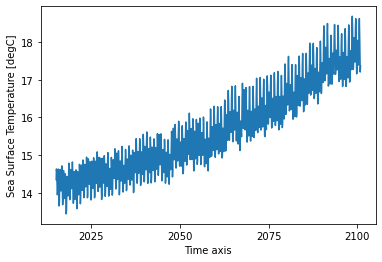

In [12]:
timeseries['/IPSL-CM6A-LR/ssp585'].ds['tos'].plot()

In [13]:
timeseries.to_zarr('cmip_timeseries')  # or netcdf, with any group structure

roundtrip = open_datatree('cmip_timeseries', engine="zarr")
roundtrip

DataTree('None', parent=None)
├── DataTree('CESM2')
│   ├── DataTree('historical')
│   │       Dimensions:      (vertex: 4, time: 1980, bnds: 2)
│   │       Coordinates:
│   │         * time         (time) object 1850-01-15 12:59:59.999997 ... 2014-12-15 12:0...
│   │       Dimensions without coordinates: vertex, bnds
│   │       Data variables:
│   │           lat          float64 ...
│   │           lat_bounds   (vertex) float32 ...
│   │           lon          float64 ...
│   │           lon_bounds   (vertex) float32 ...
│   │           time_bounds  (time, bnds) object ...
│   │           tos          (time) float32 ...
│   │       Attributes: (12/48)
│   │           Conventions:            CF-1.7 CMIP-6.2
│   │           activity_id:            CMIP
│   │           branch_method:          standard
│   │           branch_time_in_child:   674885.0
│   │           branch_time_in_parent:  182500.0
│   │           case_id:                18
│   │           ...                     ...
│   │           table_id:               Omon
│   │           tracking_id:            hdl:21.14100/b6db75cc-8b70-49a3-b115-d8ef87c3c263
│   │           variable_id:            tos
│   │           variant_info:           CMIP6 20th century experiments (1850-2014) with C...
│   │           variant_label:          r4i1p1f1
│   │           version_id:             v20190308
│   ├── DataTree('ssp126')
│   │       Dimensions:      (vertex: 4, time: 1032, bnds: 2)
│   │       Coordinates:
│   │         * time         (time) object 2015-01-15 13:00:00 ... 2100-12-15 12:00:00
│   │       Dimensions without coordinates: vertex, bnds
│   │       Data variables:
│   │           lat          float64 ...
│   │           lat_bounds   (vertex) float32 ...
│   │           lon          float64 ...
│   │           lon_bounds   (vertex) float32 ...
│   │           time_bounds  (time, bnds) object ...
│   │           tos          (time) float32 ...
│   │       Attributes: (12/48)
│   │           Conventions:            CF-1.7 CMIP-6.2
│   │           activity_id:            ScenarioMIP
│   │           branch_method:          standard
│   │           branch_time_in_child:   735110.0
│   │           branch_time_in_parent:  735110.0
│   │           case_id:                1729
│   │           ...                     ...
│   │           table_id:               Omon
│   │           tracking_id:            hdl:21.14100/35652417-1693-4d7e-9f98-db4bda0451f5...
│   │           variable_id:            tos
│   │           variant_info:           CMIP6 SSP1-2.6 experiments (2015-2100) with CAM6,...
│   │           variant_label:          r4i1p1f1
│   │           version_id:             v20200528
│   └── DataTree('ssp585')
│           Dimensions:      (vertex: 4, time: 1032, bnds: 2)
│           Coordinates:
│             * time         (time) object 2015-01-15 13:00:00 ... 2100-12-15 12:00:00
│           Dimensions without coordinates: vertex, bnds
│           Data variables:
│               lat          float64 ...
│               lat_bounds   (vertex) float32 ...
│               lon          float64 ...
│               lon_bounds   (vertex) float32 ...
│               time_bounds  (time, bnds) object ...
│               tos          (time) float32 ...
│           Attributes: (12/48)
│               Conventions:            CF-1.7 CMIP-6.2
│               activity_id:            ScenarioMIP
│               branch_method:          standard
│               branch_time_in_child:   735110.0
│               branch_time_in_parent:  735110.0
│               case_id:                1735
│               ...                     ...
│               table_id:               Omon
│               tracking_id:            hdl:21.14100/68b741c9-b8f8-479d-b48c-6853b1c71e56...
│               variable_id:            tos
│               variant_info:           CMIP6 SSP5-8.5 experiments (2015-2100) with CAM6,...
│               variant_label:          r4i1p1f1
│               version_id:             v20

In [14]:
anomaly = DataTree()
for model_name, model in timeseries.children.items():
    
    # model-specific base period
    base_period = model["historical"].ds.sel(time=slice('1950','1980')).mean('time')
    
    anomaly[model_name] = model - base_period   # subtree - Dataset

In [15]:
anomaly

DataTree('None', parent=None)
├── DataTree('IPSL-CM6A-LR')
│   ├── DataTree('historical')
│   │       Dimensions:     (time: 1980, vertex: 4)
│   │       Coordinates:
│   │         * time        (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
│   │       Dimensions without coordinates: vertex
│   │       Data variables:
│   │           area        float32 0.0
│   │           lat_bounds  (vertex) float32 0.0 0.0 0.0 0.0
│   │           lon_bounds  (vertex) float32 0.0 0.0 0.0 0.0
│   │           lat         float32 0.0
│   │           lon         float32 0.0
│   │           tos         (time) float32 -0.3845 -0.05526 -0.1129 ... 0.336 0.01544 0.1452
│   ├── DataTree('ssp126')
│   │       Dimensions:     (time: 1032, vertex: 4)
│   │       Coordinates:
│   │         * time        (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
│   │       Dimensions without coordinates: vertex
│   │       Data variables:
│   │           area        float32 0.0
│   │           lat_bounds  (vertex) float32 0.0 0.0 0.0 0.0
│   │           lon_bounds  (vertex) float32 0.0 0.0 0.0 0.0
│   │           lat         float32 0.0
│   │           lon         float32 0.0
│   │           tos         (time) float32 0.6948 1.005 0.9226 ... 0.9789 0.5494 0.5469
│   └── DataTree('ssp585')
│           Dimensions:     (time: 1032, vertex: 4)
│           Coordinates:
│             * time        (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
│           Dimensions without coordinates: vertex
│           Data variables:
│               area        float32 0.0
│               lat_bounds  (vertex) float32 0.0 0.0 0.0 0.0
│               lon_bounds  (vertex) float32 0.0 0.0 0.0 0.0
│               lat         float32 0.0
│               lon         float32 0.0
│               tos         (time) float32 0.7064 0.9878 0.8957 0.6067 ... 3.964 3.561 3.721
├── DataTree('MPI-ESM1-2-LR')
│   ├── DataTree('historical')
│   │       Dimensions:     (time: 1980, vertex: 4)
│   │       Coordinates:
│   │         * time        (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
│   │       Dimensions without coordinates: vertex
│   │       Data variables:
│   │           lat         float64 0.0
│   │           lon         float64 0.0
│   │           tos         (time) float32 -0.0001907 0.07146 -0.1137 ... 0.08675 0.2255
│   │           lat_bounds  (vertex) float64 0.0 0.0 0.0 0.0
│   │           lon_bounds  (vertex) float64 0.0 0.0 0.0 0.0
│   ├── DataTree('ssp126')
│   │       Dimensions:     (time: 1032, vertex: 4)
│   │       Coordinates:
│   │         * time        (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
│   │       Dimensions without coordinates: vertex
│   │       Data variables:
│   │           lat         float64 0.0
│   │           lon         float64 0.0
│   │           tos         (time) float32 0.5068 0.6032 0.4613 ... 0.7863 0.4328 0.4326
│   │           lat_bounds  (vertex) float64 0.0 0.0 0.0 0.0
│   │           lon_bounds  (vertex) float64 0.0 0.0 0.0 0.0
│   └── DataTree('ssp585')
│           Dimensions:     (time: 1032, vertex: 4)
│           Coordinates:
│             * time        (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
│           Dimensions without coordinates: vertex
│           Data variables:
│               lat         float64 0.0
│               lon         float64 0.0
│               tos         (time) float32 0.5021 0.6321 0.4687 0.2044 ... 2.493 1.999 2.024
│               lat_bounds  (vertex) float64 0.0 0.0 0.0 0.0
│               lon_bounds  (vertex) float64 0.0 0.0 0.0 0.0
└── DataTree('CESM2')
    ├── DataTree('historical')
    │       Dimensions:     (time: 1980, vertex: 4)
    │       Coordinates:
    │         * time        (time) object 1850-01-15 12:59:59.999997 ... 2014-12-15 12:00:00
    │       Dimensions without coordinates: vertex
    │       Data variables:
    │           lat         float64 0.0
    │           lat_bounds  (vertex) float32 0.0 0.0 0.0 0.0
    │    

DataTree('None', parent=None)
├── DataTree('IPSL-CM6A-LR')
│   ├── DataTree('historical')
│   │       Dimensions:     (time: 1980, vertex: 4)
│   │       Coordinates:
│   │         * time        (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
│   │       Dimensions without coordinates: vertex
│   │       Data variables:
│   │           area        float32 0.0
│   │           lat_bounds  (vertex) float32 0.0 0.0 0.0 0.0
│   │           lon_bounds  (vertex) float32 0.0 0.0 0.0 0.0
│   │           lat         float32 0.0
│   │           lon         float32 0.0
│   │           tos         (time) float32 -0.3845 -0.05526 -0.1129 ... 0.336 0.01544 0.1452
│   ├── DataTree('ssp126')
│   │       Dimensions:     (time: 1032, vertex: 4)
│   │       Coordinates:
│   │         * time        (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
│   │       Dimensions without coordinates: vertex
│   │       Data variables:
│   │           area        float32 0.0
│   │           lat_bounds  (vertex) float32 0.0 0.0 0.0 0.0
│   │           lon_bounds  (vertex) float32 0.0 0.0 0.0 0.0
│   │           lat         float32 0.0
│   │           lon         float32 0.0
│   │           tos         (time) float32 0.6948 1.005 0.9226 ... 0.9789 0.5494 0.5469
│   └── DataTree('ssp585')
│           Dimensions:     (time: 1032, vertex: 4)
│           Coordinates:
│             * time        (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
│           Dimensions without coordinates: vertex
│           Data variables:
│               area        float32 0.0
│               lat_bounds  (vertex) float32 0.0 0.0 0.0 0.0
│               lon_bounds  (vertex) float32 0.0 0.0 0.0 0.0
│               lat         float32 0.0
│               lon         float32 0.0
│               tos         (time) float32 0.7064 0.9878 0.8957 0.6067 ... 3.964 3.561 3.721
├── DataTree('MPI-ESM1-2-LR')
│   ├── DataTree('historical')
│   │       Dimensions:     (time: 1980, vertex: 4)
│   │       Coordinates:
│   │         * time        (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
│   │       Dimensions without coordinates: vertex
│   │       Data variables:
│   │           lat         float64 0.0
│   │           lon         float64 0.0
│   │           tos         (time) float32 -0.0001907 0.07146 -0.1137 ... 0.08675 0.2255
│   │           lat_bounds  (vertex) float64 0.0 0.0 0.0 0.0
│   │           lon_bounds  (vertex) float64 0.0 0.0 0.0 0.0
│   ├── DataTree('ssp126')
│   │       Dimensions:     (time: 1032, vertex: 4)
│   │       Coordinates:
│   │         * time        (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
│   │       Dimensions without coordinates: vertex
│   │       Data variables:
│   │           lat         float64 0.0
│   │           lon         float64 0.0
│   │           tos         (time) float32 0.5068 0.6032 0.4613 ... 0.7863 0.4328 0.4326
│   │           lat_bounds  (vertex) float64 0.0 0.0 0.0 0.0
│   │           lon_bounds  (vertex) float64 0.0 0.0 0.0 0.0
│   └── DataTree('ssp585')
│           Dimensions:     (time: 1032, vertex: 4)
│           Coordinates:
│             * time        (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
│           Dimensions without coordinates: vertex
│           Data variables:
│               lat         float64 0.0
│               lon         float64 0.0
│               tos         (time) float32 0.5021 0.6321 0.4687 0.2044 ... 2.493 1.999 2.024
│               lat_bounds  (vertex) float64 0.0 0.0 0.0 0.0
│               lon_bounds  (vertex) float64 0.0 0.0 0.0 0.0
└── DataTree('CESM2')
    ├── DataTree('historical')
    │       Dimensions:     (time: 1980, vertex: 4)
    │       Coordinates:
    │         * time        (time) object 1850-01-15 12:59:59.999997 ... 2014-12-15 12:00:00
    │       Dimensions without coordinates: vertex
    │       Data variables:
    │           lat         float64 0.0
    │           lat_bounds  (vertex) float32 0.0 0.0 0.0 0.0
    │    

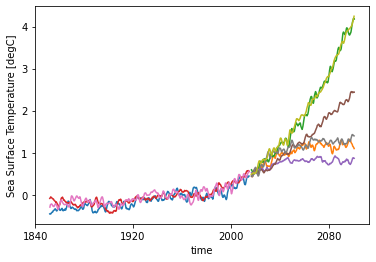

In [16]:
fig, ax = plt.subplots()


def plot_temp(ds):
    if bool(ds):
        ds['tos'].rolling(time=2*12).mean().plot(ax=ax)
    return ds


anomaly.map_over_subtree(plot_temp)

In [17]:
# oops, forgot to weight by cell area...
timeseries = dt.weighted(dt["cell_area"]).mean(dim=["x", "y"])

AttributeError: 'DataTree' object has no attribute 'weighted'

![multires](carbonplan.gif)

(creds Joe Hamman and the CarbonPlan team)

### want to help? 

Visit https://github.com/xarray-contrib/datatree

@TomNicholas

<img src="Untitled.svg" width=200 height=200 />